In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


url = 'http://th-www.if.uj.edu.pl/~erichter/dydaktyka/Dydaktyka2019/DataScience-2019/kc_house_data.csv.zip'
house_df = pd.read_csv(url)


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [37]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model = model.fit(X,y)

#Hint: .fit()

Intercept: -32304.654721
Coefficient: [269.46205468]
Score: 0.496708801663
Mean squared error: 57947526161.3


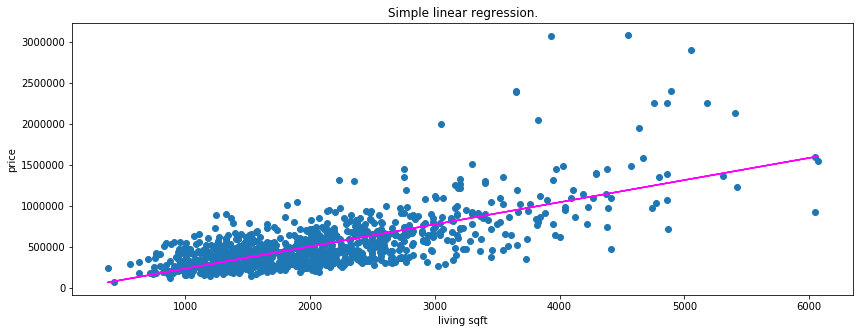

In [17]:
#b)

#Your code:
y_predicted = model.predict(X)
intercept = model.intercept_
coef = model.coef_
score = model.score(X,y)
print("Intercept: {}".format(intercept)) # mean of Y ? 
print("Coefficient: {}".format(coef))
print("Score: {}".format(score))
print("Mean squared error: {}".format(mean_squared_error(y, y_predicted)))
plt.figure(figsize=(14,5))
plt.xlabel('living sqft')
plt.ylabel('price')
plt.title('Simple linear regression.')
plt.scatter(X,y,)
plt.plot(X, y_predicted, 'magenta')


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

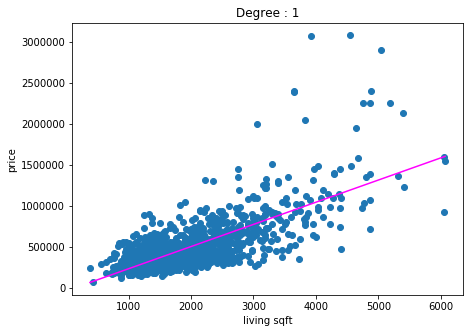

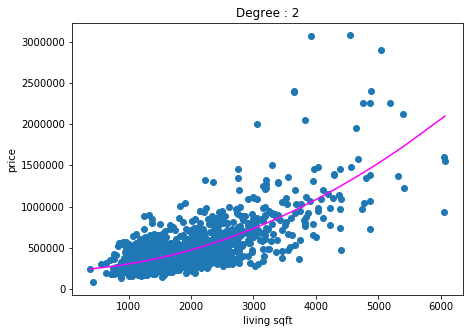

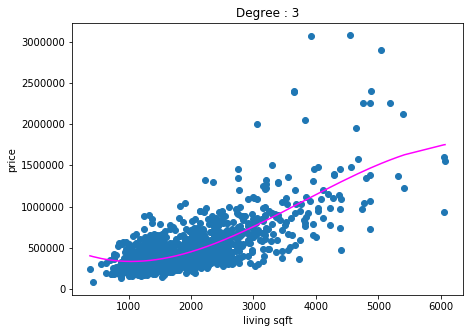

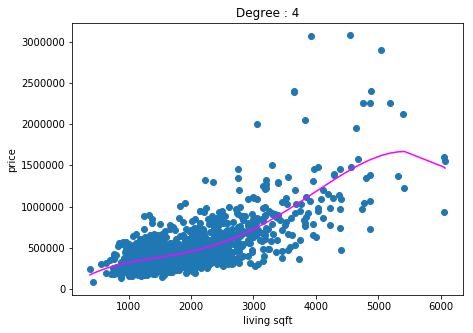

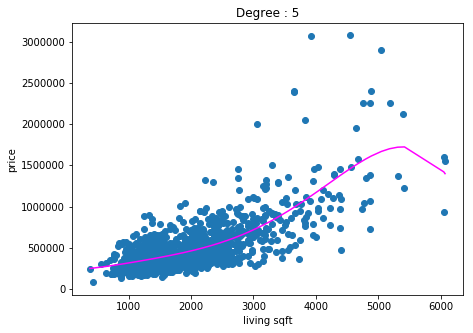

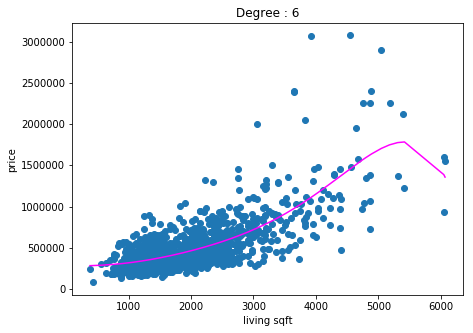

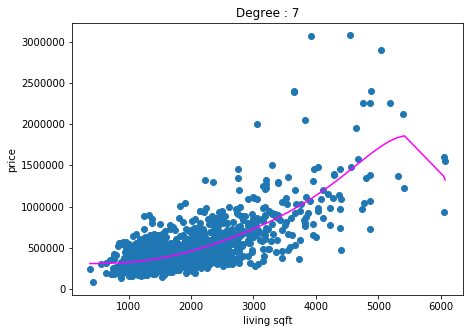

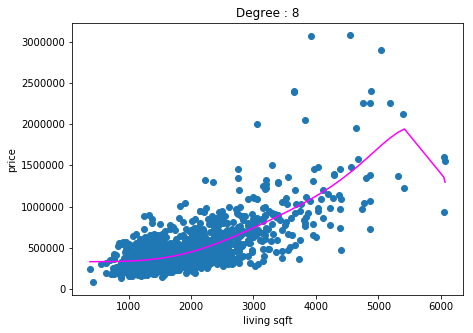

In [43]:
#c)

errors = []
L = sorted(zip(X,y), key=operator.itemgetter(0))
_X, _y = zip(*L)

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(_X)
    
    
    #Your code:
    model = LinearRegression()
    model.fit(X_order, _y)
    y_predicted = model.predict(X_order)
    errors.append(mean_squared_error(_y, y_predicted))
    plt.figure(figsize=(7,5))
    plt.xlabel('living sqft')
    plt.ylabel('price')
    plt.title('Degree : {}'.format(order))
    plt.scatter(_X,_y)
    plt.plot(_X, y_predicted, 'magenta')
   

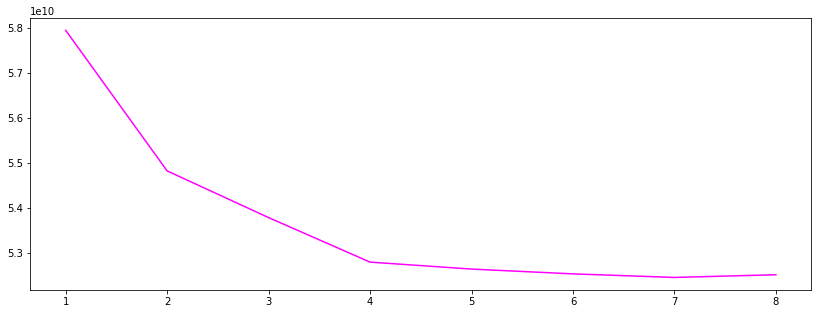

In [44]:
#Your code:
plt.figure(figsize=(14,5))
degree = [i for i in range(1,9)]
plt.plot(degree, errors, 'magenta')

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

[55543019039.506386, 52327463112.65777, 51356524820.57826, 49928666205.44916, 49563889299.41814, 49210830487.21215, 48841041895.93941, 48599199349.220314]
[63875999679.61216, 61124898636.75477, 59915847721.54824, 60216606714.16469, 60742250928.08926, 61604369670.86943, 62875271684.14265, 64618104971.62005]


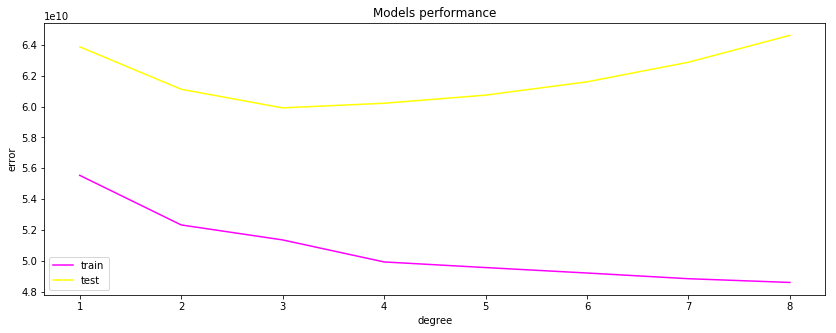

In [52]:
#a)
training_errors = []
test_errors = []

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    L_train = sorted(zip(X_train,y_train), key=operator.itemgetter(0))
    L_test = sorted(zip(X_test,y_test), key=operator.itemgetter(0))
    X_train, y_train = zip(*L_train)
    X_test, y_test = zip(*L_test)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(X_order_train, y_train)
    y_predicted_train = model.predict(X_order_train)
    y_predicted_test = model.predict(X_order_test)
    training_errors.append(mean_squared_error(y_train, y_predicted_train))
    test_errors.append(mean_squared_error(y_test, y_predicted_test))

print(training_errors)
print(test_errors)

#c)
plt.figure(figsize=(14,5))
degree = [i for i in range(1,9)]
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.plot(degree, training_errors, 'magenta', label="train")
plt.plot(degree, test_errors, 'yellow', label="test")
plt.legend(loc='lower left')

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error: 396407.188962


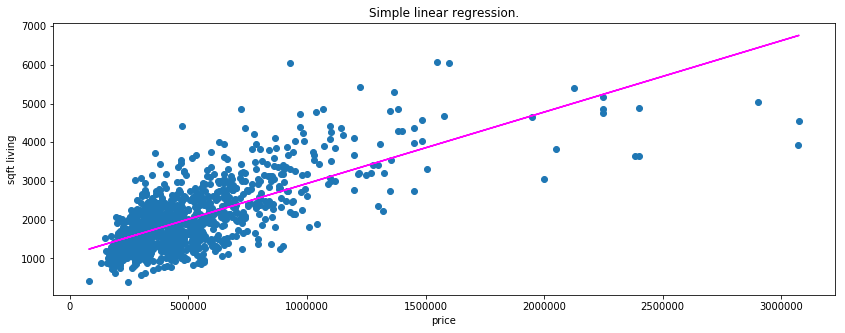

In [54]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression() 
model = model.fit(X,y)
y_predicted = model.predict(X)
plt.figure(figsize=(14,5))
plt.title("Simple linear regression.")
plt.xlabel("price")
plt.ylabel("sqft living")
plt.scatter(X,y)
plt.plot(X, y_predicted, 'magenta')
print("Mean squared error: {}".format(mean_squared_error(y, y_predicted)))

In [90]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree
import itertools
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
_X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(_X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
model = model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {}".format(mean_squared_error(y_pred, y_test)))

#Your model:
best_features = None
best_error = 9999999999999999999
best_degree = -1
all_features = ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'floors', 'yr_built','yr_renovated', 'bathrooms', 'sqft_basement', 'sqft_above', 'zipcode']
for features in list(itertools.combinations(all_features, 6)):
    features = list(features)
    print("FEATURES : {}".format(features))
    X = house_df[features].values.reshape(-1,len(features))
    y = house_df.price.values.reshape(-1)

    for order in range(1,4):
        poly = PolynomialFeatures(order, include_bias = False)
        X_order = poly.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.5, random_state=43)

        model = LinearRegression() 
        model = model.fit(X_train, y_train) 

        y_pred = model.predict(X_test)
        error = mean_squared_error(y_pred, y_test)
        print("Order: {} - mean squared error: {}".format(order,error))
        if error < best_error:
              best_features = features
              best_error = error
              best_degree = order
              
            


Mean squared error equals: 48749916937.7
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'floors']
Order: 1 - mean squared error: 57955607510.9
Order: 2 - mean squared error: 50143483838.7
Order: 3 - mean squared error: 95710276581.3
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'yr_built']
Order: 1 - mean squared error: 51335282966.7
Order: 2 - mean squared error: 42941031790.5
Order: 3 - mean squared error: 46775090586.8
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'yr_renovated']
Order: 1 - mean squared error: 57460976017.3
Order: 2 - mean squared error: 48692570404.8
Order: 3 - mean squared error: 48317072737.3
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'bathrooms']
Order: 1 - mean squared error: 58043854490.5
Order: 2 - mean squared error: 50307865305.0
Order: 3 - mean squared error: 1.03956241123e+11
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms', 'sqft_basement']
Order: 

Order: 3 - mean squared error: 46859932119.2
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'bedrooms', 'yr_built', 'zipcode']
Order: 1 - mean squared error: 54598081517.0
Order: 2 - mean squared error: 45202085203.3
Order: 3 - mean squared error: 44421733442.5
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'bedrooms', 'yr_renovated', 'bathrooms']
Order: 1 - mean squared error: 62375962612.7
Order: 2 - mean squared error: 53051386301.5
Order: 3 - mean squared error: 1.44291474879e+11
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'bedrooms', 'yr_renovated', 'sqft_basement']
Order: 1 - mean squared error: 61671937720.1
Order: 2 - mean squared error: 51312228728.7
Order: 3 - mean squared error: 52356805853.2
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'bedrooms', 'yr_renovated', 'sqft_above']
Order: 1 - mean squared error: 61671937720.1
Order: 2 - mean squared error: 51312228663.5
Order: 3 - mean squared error: 53611960354.0
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'bedroom

Order: 3 - mean squared error: 56355114926.8
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'yr_renovated', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 62491362292.3
Order: 2 - mean squared error: 51475062063.4
Order: 3 - mean squared error: 61990372481.3
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'yr_renovated', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 62441125564.5
Order: 2 - mean squared error: 52106829338.8
Order: 3 - mean squared error: 52704421145.5
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'yr_renovated', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 62956006181.2
Order: 2 - mean squared error: 51456304916.2
Order: 3 - mean squared error: 55427833805.7
FEATURES : ['sqft_living', 'sqft_lot', 'grade', 'yr_renovated', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 62202097097.7
Order: 2 - mean squared error: 50540249702.7
Order: 3 - mean squared error: 52330937595.5
FEATURES : ['sqft_living', 'sqft_lot', 'grade', '

Order: 3 - mean squared error: 60495831900.1
FEATURES : ['sqft_living', 'sqft_lot', 'view', 'floors', 'yr_renovated', 'sqft_above']
Order: 1 - mean squared error: 63050981073.6
Order: 2 - mean squared error: 55742433440.9
Order: 3 - mean squared error: 1.8511033269e+11
FEATURES : ['sqft_living', 'sqft_lot', 'view', 'floors', 'yr_renovated', 'zipcode']
Order: 1 - mean squared error: 62772440133.2
Order: 2 - mean squared error: 54513089787.9
Order: 3 - mean squared error: 53700229706.3
FEATURES : ['sqft_living', 'sqft_lot', 'view', 'floors', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 63608313533.8
Order: 2 - mean squared error: 56577603219.1
Order: 3 - mean squared error: 59429459533.7
FEATURES : ['sqft_living', 'sqft_lot', 'view', 'floors', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 63608313533.8
Order: 2 - mean squared error: 56577603117.2
Order: 3 - mean squared error: 3.50899839033e+11
FEATURES : ['sqft_living', 'sqft_lot', 'view', 'floors', 'bathroom

Order: 3 - mean squared error: 72281300551.9
FEATURES : ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 67987672168.8
Order: 2 - mean squared error: 61546529061.4
Order: 3 - mean squared error: 79078768716.7
FEATURES : ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 67317564273.5
Order: 2 - mean squared error: 60499016932.5
Order: 3 - mean squared error: 62451352972.8
FEATURES : ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 67982307445.2
Order: 2 - mean squared error: 62031546803.7
Order: 3 - mean squared error: 1.31913986758e+11
FEATURES : ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 67327481390.2
Order: 2 - mean squared error: 60897513297.0
Order: 3 - mean squared error: 60347181658.3
FEATURES : ['sqft_living', 'sqft_lot', 'bedrooms', 'floor

Order: 3 - mean squared error: 61123800721.0
FEATURES : ['sqft_living', 'sqft_lot', 'floors', 'yr_renovated', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 69343414247.5
Order: 2 - mean squared error: 61584964885.3
Order: 3 - mean squared error: 93359452874.2
FEATURES : ['sqft_living', 'sqft_lot', 'floors', 'yr_renovated', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 68644522517.3
Order: 2 - mean squared error: 60198016726.7
Order: 3 - mean squared error: 66276798304.6
FEATURES : ['sqft_living', 'sqft_lot', 'floors', 'yr_renovated', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 68644522517.3
Order: 2 - mean squared error: 60197809927.8
Order: 3 - mean squared error: 64452831171.3
FEATURES : ['sqft_living', 'sqft_lot', 'floors', 'bathrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 70340703874.7
Order: 2 - mean squared error: 62991407641.5
Order: 3 - mean squared error: 1.00874546816e+11
FEATURES : ['sqft_living', 'sqft_lot', 

Order: 3 - mean squared error: 54579769260.4
FEATURES : ['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 57956142908.2
Order: 2 - mean squared error: 50852678671.8
Order: 3 - mean squared error: 53487856741.8
FEATURES : ['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 57956142908.2
Order: 2 - mean squared error: 50852678671.0
Order: 3 - mean squared error: 53487742067.7
FEATURES : ['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 57809556598.0
Order: 2 - mean squared error: 50836492321.6
Order: 3 - mean squared error: 52696117224.9
FEATURES : ['sqft_living', 'grade', 'view', 'bedrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 58082283603.5
Order: 2 - mean squared error: 50609542435.7
Order: 3 - mean squared error: 49636005734.7
FEATURES : ['sqft_living', 'grade', 'view', 'bedrooms', 'sqft_basement', 'zipco

Order: 3 - mean squared error: 52244645957.4
FEATURES : ['sqft_living', 'grade', 'view', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 58204538801.9
Order: 2 - mean squared error: 50009730627.7
Order: 3 - mean squared error: 50166839125.8
FEATURES : ['sqft_living', 'grade', 'view', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 58204538801.9
Order: 2 - mean squared error: 50009735854.0
Order: 3 - mean squared error: 2.84204914706e+11
FEATURES : ['sqft_living', 'grade', 'view', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 58421903128.0
Order: 2 - mean squared error: 49878493196.0
Order: 3 - mean squared error: 48236479774.6
FEATURES : ['sqft_living', 'grade', 'bedrooms', 'floors', 'yr_built', 'yr_renovated']
Order: 1 - mean squared error: 54476828742.4
Order: 2 - mean squared error: 45937995922.9
Order: 3 - mean squared error: 45374644177.3
FEATURES : ['sqft_living', 'grade', 'bedrooms', 'floors', 'yr_built', 'b

Order: 3 - mean squared error: 7.65934936738e+11
FEATURES : ['sqft_living', 'grade', 'bedrooms', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 62130328087.8
Order: 2 - mean squared error: 54010723093.7
Order: 3 - mean squared error: 53112543340.3
FEATURES : ['sqft_living', 'grade', 'floors', 'yr_built', 'yr_renovated', 'bathrooms']
Order: 1 - mean squared error: 55377785457.6
Order: 2 - mean squared error: 45861908035.2
Order: 3 - mean squared error: 46458673241.7
FEATURES : ['sqft_living', 'grade', 'floors', 'yr_built', 'yr_renovated', 'sqft_basement']
Order: 1 - mean squared error: 55402727332.4
Order: 2 - mean squared error: 45524448160.2
Order: 3 - mean squared error: 46685153040.1
FEATURES : ['sqft_living', 'grade', 'floors', 'yr_built', 'yr_renovated', 'sqft_above']
Order: 1 - mean squared error: 55402727332.4
Order: 2 - mean squared error: 45524448132.0
Order: 3 - mean squared error: 51774247402.5
FEATURES : ['sqft_living', 'grade', 'floors', 'yr_built

Order: 3 - mean squared error: 51508098388.0
FEATURES : ['sqft_living', 'view', 'bedrooms', 'floors', 'yr_built', 'bathrooms']
Order: 1 - mean squared error: 57531250123.9
Order: 2 - mean squared error: 52605497773.4
Order: 3 - mean squared error: 52682544111.3
FEATURES : ['sqft_living', 'view', 'bedrooms', 'floors', 'yr_built', 'sqft_basement']
Order: 1 - mean squared error: 58216289898.8
Order: 2 - mean squared error: 52687540442.8
Order: 3 - mean squared error: 51704591139.1
FEATURES : ['sqft_living', 'view', 'bedrooms', 'floors', 'yr_built', 'sqft_above']
Order: 1 - mean squared error: 58216289898.8
Order: 2 - mean squared error: 52687540460.3
Order: 3 - mean squared error: 52292743420.5
FEATURES : ['sqft_living', 'view', 'bedrooms', 'floors', 'yr_built', 'zipcode']
Order: 1 - mean squared error: 58209731476.7
Order: 2 - mean squared error: 51558888951.7
Order: 3 - mean squared error: 50940063760.1
FEATURES : ['sqft_living', 'view', 'bedrooms', 'floors', 'yr_renovated', 'bathrooms'

Order: 3 - mean squared error: 77820605632.5
FEATURES : ['sqft_living', 'view', 'floors', 'yr_built', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 59469173318.4
Order: 2 - mean squared error: 53281354700.3
Order: 3 - mean squared error: 53569781455.9
FEATURES : ['sqft_living', 'view', 'floors', 'yr_built', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 59469173318.4
Order: 2 - mean squared error: 53281354722.3
Order: 3 - mean squared error: 53628363133.6
FEATURES : ['sqft_living', 'view', 'floors', 'yr_built', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 59558671221.2
Order: 2 - mean squared error: 52161851681.4
Order: 3 - mean squared error: 1.25144686958e+11
FEATURES : ['sqft_living', 'view', 'floors', 'yr_built', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 59812064681.7
Order: 2 - mean squared error: 53300489288.3
Order: 3 - mean squared error: 51853930490.3
FEATURES : ['sqft_living', 'view', 'floors', 'yr_built', 'sqft_basement

Order: 3 - mean squared error: 1.15318096802e+11
FEATURES : ['sqft_living', 'bedrooms', 'floors', 'yr_built', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 62698025993.9
Order: 2 - mean squared error: 57661355000.1
Order: 3 - mean squared error: 57395842896.3
FEATURES : ['sqft_living', 'bedrooms', 'floors', 'yr_built', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 62710720521.0
Order: 2 - mean squared error: 56829337961.0
Order: 3 - mean squared error: 1.66802532478e+11
FEATURES : ['sqft_living', 'bedrooms', 'floors', 'yr_built', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 62710720521.0
Order: 2 - mean squared error: 56829360128.2
Order: 3 - mean squared error: 2.39223219721e+11
FEATURES : ['sqft_living', 'bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 67247631957.9
Order: 2 - mean squared error: 61235127280.2
Order: 3 - mean squared error: 65493060727.1
FEATURES : ['sqft_living', 'bedrooms', 'f

Order: 3 - mean squared error: 1.53976241893e+11
FEATURES : ['sqft_living', 'floors', 'yr_built', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 64716163307.4
Order: 2 - mean squared error: 57927698948.8
Order: 3 - mean squared error: 2.97966121246e+11
FEATURES : ['sqft_living', 'floors', 'yr_built', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 65092206619.3
Order: 2 - mean squared error: 57992742221.7
Order: 3 - mean squared error: 56404154947.9
FEATURES : ['sqft_living', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 69407965668.8
Order: 2 - mean squared error: 62231257106.7
Order: 3 - mean squared error: 66957102973.0
FEATURES : ['sqft_living', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 68717270925.4
Order: 2 - mean squared error: 60950031876.9
Order: 3 - mean squared error: 65590607708.8
FEATURES : ['sqft_living', 'floors', '

Order: 2 - mean squared error: 52867285188.7
Order: 3 - mean squared error: 51715142301.6
FEATURES : ['sqft_lot', 'grade', 'view', 'floors', 'yr_renovated', 'bathrooms']
Order: 1 - mean squared error: 65923839699.9
Order: 2 - mean squared error: 54703519893.0
Order: 3 - mean squared error: 57235932398.7
FEATURES : ['sqft_lot', 'grade', 'view', 'floors', 'yr_renovated', 'sqft_basement']
Order: 1 - mean squared error: 64016596943.3
Order: 2 - mean squared error: 53857564991.9
Order: 3 - mean squared error: 59282621049.3
FEATURES : ['sqft_lot', 'grade', 'view', 'floors', 'yr_renovated', 'sqft_above']
Order: 1 - mean squared error: 63022066650.1
Order: 2 - mean squared error: 53454340600.9
Order: 3 - mean squared error: 53444388662.0
FEATURES : ['sqft_lot', 'grade', 'view', 'floors', 'yr_renovated', 'zipcode']
Order: 1 - mean squared error: 67244473642.9
Order: 2 - mean squared error: 57983976893.0
Order: 3 - mean squared error: 57695149289.6
FEATURES : ['sqft_lot', 'grade', 'view', 'floor

Order: 1 - mean squared error: 70957670660.6
Order: 2 - mean squared error: 59833278543.2
Order: 3 - mean squared error: 58868362835.9
FEATURES : ['sqft_lot', 'grade', 'bedrooms', 'floors', 'yr_renovated', 'zipcode']
Order: 1 - mean squared error: 73684682748.2
Order: 2 - mean squared error: 62559622211.0
Order: 3 - mean squared error: 62303482719.1
FEATURES : ['sqft_lot', 'grade', 'bedrooms', 'floors', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 70470364701.5
Order: 2 - mean squared error: 56786797346.3
Order: 3 - mean squared error: 62410059915.4
FEATURES : ['sqft_lot', 'grade', 'bedrooms', 'floors', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 72027260724.1
Order: 2 - mean squared error: 60973640058.7
Order: 3 - mean squared error: 66229875297.8
FEATURES : ['sqft_lot', 'grade', 'bedrooms', 'floors', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 73799543209.5
Order: 2 - mean squared error: 61340220508.3
Order: 3 - mean squared error: 61973147912

Order: 3 - mean squared error: 56256696354.8
FEATURES : ['sqft_lot', 'grade', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 69056588578.9
Order: 2 - mean squared error: 55211410831.2
Order: 3 - mean squared error: 59507848121.8
FEATURES : ['sqft_lot', 'grade', 'floors', 'yr_renovated', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 70340996019.6
Order: 2 - mean squared error: 58099544573.6
Order: 3 - mean squared error: 58244438372.2
FEATURES : ['sqft_lot', 'grade', 'floors', 'yr_renovated', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 72365059299.5
Order: 2 - mean squared error: 59097647674.8
Order: 3 - mean squared error: 59905834551.8
FEATURES : ['sqft_lot', 'grade', 'floors', 'yr_renovated', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 62837702521.2
Order: 2 - mean squared error: 51197178722.4
Order: 3 - mean squared error: 55316955266.9
FEATURES : ['sqft_lot', 'grade', 'floors', 'yr_renovated', 'sqft_ba

Order: 3 - mean squared error: 54848073861.5
FEATURES : ['sqft_lot', 'view', 'bedrooms', 'floors', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 89924326606.9
Order: 2 - mean squared error: 80151430750.1
Order: 3 - mean squared error: 97313970919.2
FEATURES : ['sqft_lot', 'view', 'bedrooms', 'floors', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 73569504665.7
Order: 2 - mean squared error: 64614115295.0
Order: 3 - mean squared error: 77522940932.9
FEATURES : ['sqft_lot', 'view', 'bedrooms', 'yr_built', 'yr_renovated', 'bathrooms']
Order: 1 - mean squared error: 81337330718.9
Order: 2 - mean squared error: 73953374938.8
Order: 3 - mean squared error: 77979959275.2
FEATURES : ['sqft_lot', 'view', 'bedrooms', 'yr_built', 'yr_renovated', 'sqft_basement']
Order: 1 - mean squared error: 97970719277.0
Order: 2 - mean squared error: 88076269271.6
Order: 3 - mean squared error: 1.03879831289e+11
FEATURES : ['sqft_lot', 'view', 'bedrooms', 'yr_built', 'yr_renovated', 'sqf

Order: 3 - mean squared error: 64091732275.7
FEATURES : ['sqft_lot', 'view', 'floors', 'bathrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 63608313533.8
Order: 2 - mean squared error: 56577596106.7
Order: 3 - mean squared error: 57698585953.2
FEATURES : ['sqft_lot', 'view', 'floors', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 83507223510.5
Order: 2 - mean squared error: 71764142175.5
Order: 3 - mean squared error: 80697289299.8
FEATURES : ['sqft_lot', 'view', 'floors', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 71037597463.7
Order: 2 - mean squared error: 61638969649.4
Order: 3 - mean squared error: 2.73906862497e+11
FEATURES : ['sqft_lot', 'view', 'floors', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 63304530424.8
Order: 2 - mean squared error: 55486845963.3
Order: 3 - mean squared error: 53209906727.5
FEATURES : ['sqft_lot', 'view', 'yr_built', 'yr_renovated', 'bathrooms', 'sqft

Order: 2 - mean squared error: 79428703100.7
Order: 3 - mean squared error: 1.10817022851e+11
FEATURES : ['sqft_lot', 'bedrooms', 'floors', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 81487531648.3
Order: 2 - mean squared error: 73284846104.3
Order: 3 - mean squared error: 1.09430470488e+11
FEATURES : ['sqft_lot', 'bedrooms', 'floors', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 67327481390.2
Order: 2 - mean squared error: 60974853741.5
Order: 3 - mean squared error: 60611223554.8
FEATURES : ['sqft_lot', 'bedrooms', 'yr_built', 'yr_renovated', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 89832992243.1
Order: 2 - mean squared error: 80113926942.6
Order: 3 - mean squared error: 84648871927.2
FEATURES : ['sqft_lot', 'bedrooms', 'yr_built', 'yr_renovated', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 72912794541.7
Order: 2 - mean squared error: 65277694010.6
Order: 3 - mean squared error: 67992392532.9
FEATU

Order: 1 - mean squared error: 68663025473.3
Order: 2 - mean squared error: 61263919025.5
Order: 3 - mean squared error: 64845646490.0
FEATURES : ['grade', 'view', 'bedrooms', 'floors', 'yr_built', 'yr_renovated']
Order: 1 - mean squared error: 60411539964.2
Order: 2 - mean squared error: 51499329848.5
Order: 3 - mean squared error: 50086209485.3
FEATURES : ['grade', 'view', 'bedrooms', 'floors', 'yr_built', 'bathrooms']
Order: 1 - mean squared error: 57153246862.5
Order: 2 - mean squared error: 47623593216.8
Order: 3 - mean squared error: 46210832785.0
FEATURES : ['grade', 'view', 'bedrooms', 'floors', 'yr_built', 'sqft_basement']
Order: 1 - mean squared error: 58384075053.2
Order: 2 - mean squared error: 49224467170.6
Order: 3 - mean squared error: 47454123846.9
FEATURES : ['grade', 'view', 'bedrooms', 'floors', 'yr_built', 'sqft_above']
Order: 1 - mean squared error: 56467784689.2
Order: 2 - mean squared error: 47547189950.9
Order: 3 - mean squared error: 45780631311.8
FEATURES : ['

Order: 3 - mean squared error: 49626785621.1
FEATURES : ['grade', 'view', 'floors', 'yr_built', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 56367620691.2
Order: 2 - mean squared error: 46657640405.8
Order: 3 - mean squared error: 46109513986.3
FEATURES : ['grade', 'view', 'floors', 'yr_built', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 54431135541.1
Order: 2 - mean squared error: 45184285491.2
Order: 3 - mean squared error: 44183974661.1
FEATURES : ['grade', 'view', 'floors', 'yr_built', 'bathrooms', 'zipcode']
Order: 1 - mean squared error: 57042735158.3
Order: 2 - mean squared error: 46965033117.0
Order: 3 - mean squared error: 79485631941.6
FEATURES : ['grade', 'view', 'floors', 'yr_built', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 52033306200.8
Order: 2 - mean squared error: 43322808917.5
Order: 3 - mean squared error: 42503679571.6
FEATURES : ['grade', 'view', 'floors', 'yr_built', 'sqft_basement', 'zipcode']
Order: 1 - mean squa

Order: 3 - mean squared error: 46293030715.2
FEATURES : ['grade', 'bedrooms', 'floors', 'yr_built', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 62185814171.6
Order: 2 - mean squared error: 51909078646.5
Order: 3 - mean squared error: 49936743019.6
FEATURES : ['grade', 'bedrooms', 'floors', 'yr_built', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 62152439423.9
Order: 2 - mean squared error: 52534949441.5
Order: 3 - mean squared error: 48900740706.6
FEATURES : ['grade', 'bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement']
Order: 1 - mean squared error: 69070770666.6
Order: 2 - mean squared error: 55283859869.9
Order: 3 - mean squared error: 57017434464.3
FEATURES : ['grade', 'bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_above']
Order: 1 - mean squared error: 70373887515.8
Order: 2 - mean squared error: 58399706267.4
Order: 3 - mean squared error: 59408454306.6
FEATURES : ['grade', 'bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'zipc

Order: 3 - mean squared error: 53668417362.5
FEATURES : ['grade', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 68788773759.5
Order: 2 - mean squared error: 54998524183.1
Order: 3 - mean squared error: 54901876444.6
FEATURES : ['grade', 'floors', 'yr_renovated', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 68864633106.0
Order: 2 - mean squared error: 57026836538.1
Order: 3 - mean squared error: 56061348612.2
FEATURES : ['grade', 'floors', 'yr_renovated', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 62055370194.3
Order: 2 - mean squared error: 50858795206.7
Order: 3 - mean squared error: 51529498848.1
FEATURES : ['grade', 'floors', 'bathrooms', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 62947339517.5
Order: 2 - mean squared error: 53348954960.3
Order: 3 - mean squared error: 57967504028.1
FEATURES : ['grade', 'yr_built', 'yr_renovated', 'bathrooms', 'sqft

Order: 3 - mean squared error: 70413979444.0
FEATURES : ['view', 'bedrooms', 'yr_built', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 64711521418.2
Order: 2 - mean squared error: 56465647321.6
Order: 3 - mean squared error: 54757966207.2
FEATURES : ['view', 'bedrooms', 'yr_built', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 59015032850.0
Order: 2 - mean squared error: 51872594728.6
Order: 3 - mean squared error: 49020796791.4
FEATURES : ['view', 'bedrooms', 'yr_renovated', 'bathrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 61869698599.3
Order: 2 - mean squared error: 56665738518.7
Order: 3 - mean squared error: 58266252956.6
FEATURES : ['view', 'bedrooms', 'yr_renovated', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 83985879930.1
Order: 2 - mean squared error: 73795519396.8
Order: 3 - mean squared error: 72298429660.3
FEATURES : ['view', 'bedrooms', 'yr_renovated', 'bathrooms', 'sqft

Order: 3 - mean squared error: 56188921718.7
FEATURES : ['bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement', 'sqft_above']
Order: 1 - mean squared error: 67247631957.9
Order: 2 - mean squared error: 61235127282.9
Order: 3 - mean squared error: 65494269612.9
FEATURES : ['bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_basement', 'zipcode']
Order: 1 - mean squared error: 93155328711.0
Order: 2 - mean squared error: 78751667923.7
Order: 3 - mean squared error: 80533705104.3
FEATURES : ['bedrooms', 'floors', 'yr_renovated', 'bathrooms', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 80297412411.4
Order: 2 - mean squared error: 71512391543.5
Order: 3 - mean squared error: 73822386558.4
FEATURES : ['bedrooms', 'floors', 'yr_renovated', 'sqft_basement', 'sqft_above', 'zipcode']
Order: 1 - mean squared error: 66643334175.5
Order: 2 - mean squared error: 59856875854.4
Order: 3 - mean squared error: 63922411022.2
FEATURES : ['bedrooms', 'floors', 'bathrooms', 'sq

In [92]:
print("Best features: {}".format(best_features))
print("Best error: {}".format(best_error))
print("degree: {}".format(best_degree))

Best features: ['grade', 'view', 'yr_built', 'sqft_basement', 'sqft_above', 'zipcode']
Best error: 39371273807.3
degree: 3
